In [146]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from math import pi

In [147]:
def regresion_lineal(x,y):
    # y = ax + b
    x,y = np.array(x), np.array(y)
    n = len(x)
    a = (n*sum(x*y)-sum(x)*sum(y))/(n*sum(x**2)-sum(x)**2)
    b = (sum(y)-a*sum(x))/n
    sigma3 = 3*(sum((y - a*x - b)**2)/(n-2))**0.5
    Da = (n**0.5*sigma3)/(n*sum(x**2)-sum(x)**2)**0.5
    Db = Da*(sum(x**2)/n)**0.5
    r = sum((x-sum(x)/n)*(y-sum(y)/n))/((sum((x-sum(x)/n)**2)**0.5)*(sum((y-sum(y)/n)**2))**0.5)
    return a,b, Da, Db, r

In [148]:
def representar_numero(num, Dnum):
    sgn_num = num/abs(num)
    num *= sgn_num
    factor = 0
    while num*(10**factor) < 1:
        factor += 1
    while num*(10**factor) >= 10:
        factor -= 1

    r = 2
    while round(Dnum*10**factor,r) == 0:
        r += 1
    error = round(Dnum*10**factor,r)
    if len(str(error)) == 3:
        error = str(error) + "0"
    
    
    if factor == 0:
        return f"{sgn_num*round(num,r)} ± {error}"
    elif factor == 1:
        return f"({sgn_num*round(num*10,r)} ± {error})*10"
    else:
        return f"({sgn_num*round(num*10**factor,r)} ± {error})*10^{-factor}"

def representar_r(r):
    sgn = r/abs(r)
    r *= sgn
    i = 2
    while str(r)[:i] == "0." + "9"*(i-2):
        i += 1
    return sgn*round(r, i-2)

## Agua

Periodo en agua: (1.23 ± 0.03)*10^-6
Longitud de onda en agua: (1.83 ± 0.29)*10^-3
Velocidad pseudoteórica: (1.49 ± 0.27)*10^3
Velocidad en agua: (1.48 ± 0.05)*10^3
Coordenada origen: (4.18 ± 22.48)*10^-4
r²: 0.999


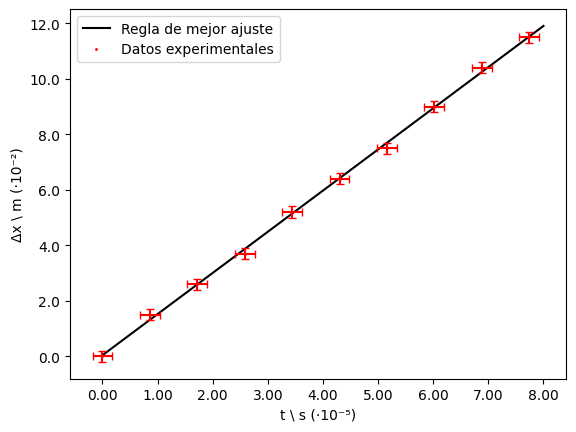

In [149]:
# Onda sinusoidal
T_cuadrados = 8.6
DT_cuadrados = 0.2
T_cuadrado = 1*10**(-6)
T_periodos = 7
T = (T_cuadrados*T_cuadrado)/T_periodos # Periodo de la onda
DT = T_cuadrado/T_periodos * DT_cuadrados
print(f"Periodo en agua: {representar_numero(T, DT)}")

oscilaciones_7T = np.array([369, 384, 395, 406, 421, 433, 444, 459, 473, 484])/1000
Dx = 10**(-3)
aumentos_x = oscilaciones_7T[1:] - oscilaciones_7T[:-1]
lamb = sum(aumentos_x)/(7*len(aumentos_x))
Dlamb = 2/7*Dx
print(f"Longitud de onda en agua: {representar_numero(lamb, Dlamb)}")

print(f"Velocidad pseudoteórica: {representar_numero(lamb/T, Dlamb/T + lamb/(T**2)*DT)}")

X = np.array(list(7*T*n for n in range(len(oscilaciones_7T))))
Y = (oscilaciones_7T - oscilaciones_7T[0])
ajuste = regresion_lineal(X,Y)
print(f"Velocidad en agua: {representar_numero(ajuste[0], ajuste[2])}")
print(f"Coordenada origen: {representar_numero(ajuste[1], ajuste[3])}")
print(f"r²: {representar_r(ajuste[4]**2)}")

X = 10**5*X
Y = 10**2*Y

p = np.polyfit(X,Y,1)
x = np.linspace(0, 8)
y = np.polyval(p, x)

fig = plt.figure()
plt.plot(x, y, label="Regla de mejor ajuste", color="black")
plt.plot(X, Y, "o", label="Datos experimentales", color="red", markersize=1)
plt.legend()
plt.errorbar(X, Y, xerr=0.18, ls="none", color="red", barsabove=True, capsize=3)
plt.errorbar(X, Y, yerr=0.2, ls="none", color="red", barsabove=True, capsize=3)
xformatter = ticker.FuncFormatter(lambda x, _: f"{x:.2f}")
yformatter = ticker.FuncFormatter(lambda x, _: f"{x:.1f}")
plt.gca().xaxis.set_major_formatter(xformatter)
plt.gca().yaxis.set_major_formatter(yformatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.xlabel("t \\ s (⋅10⁻⁵)")
plt.ylabel("Δx \\ m (⋅10⁻²)")
plt.show()
fig.savefig('Fotos/fase_agua.png')

Velocidad de grupo en agua: (1.54 ± 0.02)*10^3
Coordenada origen: (-5.56 ± 10.96)*10^-4
r²: 0.9998


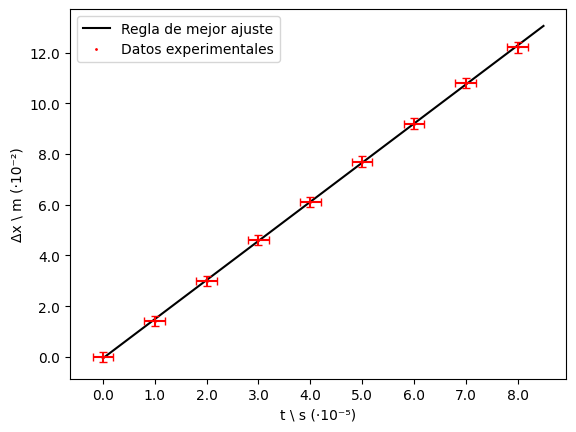

In [150]:
# Velocidad de pulso
T_cuadrado = 10*10**(-6)
pulso_T10 = np.array([363, 377, 393, 409, 424, 440, 455, 471, 485])/1000

X = np.array(list(T_cuadrado*n for n in range(len(pulso_T10))))
Y = (pulso_T10 - pulso_T10[0])
ajuste = regresion_lineal(X,Y)
print(f"Velocidad de grupo en agua: {representar_numero(ajuste[0], ajuste[2])}")
print(f"Coordenada origen: {representar_numero(ajuste[1], ajuste[3])}")
print(f"r²: {representar_r(ajuste[4]**2)}")

X = 10**5*X
Y = 10**2*Y

p = np.polyfit(X,Y,1)
x = np.linspace(0, 8.5)
y = np.polyval(p, x)

fig = plt.figure()
plt.plot(x, y, label="Regla de mejor ajuste", color="black")
plt.plot(X, Y, "o", label="Datos experimentales", color="red", markersize=1)
plt.legend()
plt.errorbar(X, Y, xerr=0.2, ls="none", color="red", barsabove=True, capsize=3)
plt.errorbar(X, Y, yerr=0.2, ls="none", color="red", barsabove=True, capsize=3)
xformatter = ticker.FuncFormatter(lambda x, _: f"{x:.1f}")
yformatter = ticker.FuncFormatter(lambda x, _: f"{x:.1f}")
plt.gca().xaxis.set_major_formatter(xformatter)
plt.gca().yaxis.set_major_formatter(yformatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.xlabel("t \\ s (⋅10⁻⁵)")
plt.ylabel("Δx \\ m (⋅10⁻²)")
plt.show()
fig.savefig('Fotos/grupo_agua.png')

## Alcohol

Periodo en alcohol: (1.23 ± 0.03)*10^-6
Longitud de onda en alcohol: (1.78 ± 0.22)*10^-3
Velocidad pseudoteórica: (1.45 ± 0.21)*10^3
Velocidad en alcohol: (1.43 ± 0.06)*10^3
Coordenada origen: (-8.0 ± 35.7)*10^-4
r²: 0.998


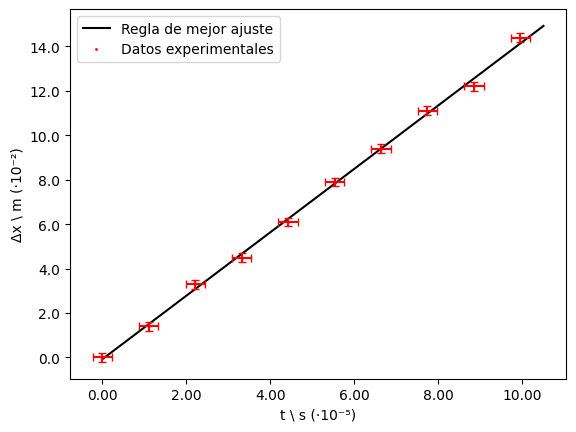

In [151]:
# Onda sinusoidal
T_cuadrados = 8.6
DT_cuadrados = 0.2
T_cuadrado = 1*10**(-6)
T_periodos = 7
T = (T_cuadrados*T_cuadrado)/T_periodos # Periodo de la onda
DT = T_cuadrado/T_periodos * DT_cuadrados
print(f"Periodo en alcohol: {representar_numero(T, DT)}")

oscilaciones_9T = np.array([353, 367, 386, 398, 414, 432, 447, 464, 475, 497])/1000
Dx = 10**(-3)
aumentos_x = oscilaciones_9T[1:] - oscilaciones_9T[:-1]
lamb = sum(aumentos_x)/(9*len(aumentos_x))
Dlamb = 2/9*Dx
print(f"Longitud de onda en alcohol: {representar_numero(lamb, Dlamb)}")

print(f"Velocidad pseudoteórica: {representar_numero(lamb/T, Dlamb/T + lamb/(T**2)*DT)}")

X = np.array(list(9*T*n for n in range(len(oscilaciones_9T))))
Y = (oscilaciones_9T - oscilaciones_9T[0])
ajuste = regresion_lineal(X,Y)
print(f"Velocidad en alcohol: {representar_numero(ajuste[0], ajuste[2])}")
print(f"Coordenada origen: {representar_numero(ajuste[1], ajuste[3])}")
print(f"r²: {representar_r(ajuste[4]**2)}")

X = 10**5*X
Y = 10**2*Y

p = np.polyfit(X,Y,1)
x = np.linspace(0, 10.5)
y = np.polyval(p, x)

fig = plt.figure()
plt.plot(x, y, label="Regla de mejor ajuste", color="black")
plt.plot(X, Y, "o", label="Datos experimentales", color="red", markersize=1)
plt.legend()
plt.errorbar(X, Y, xerr=0.23, ls="none", color="red", barsabove=True, capsize=3)
plt.errorbar(X, Y, yerr=0.2, ls="none", color="red", barsabove=True, capsize=3)
xformatter = ticker.FuncFormatter(lambda x, _: f"{x:.2f}")
yformatter = ticker.FuncFormatter(lambda x, _: f"{x:.1f}")
plt.gca().xaxis.set_major_formatter(xformatter)
plt.gca().yaxis.set_major_formatter(yformatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.xlabel("t \\ s (⋅10⁻⁵)")
plt.ylabel("Δx \\ m (⋅10⁻²)")
plt.show()
fig.savefig('Fotos/fase_alcohol.png')

Velocidad de grupo en alcohol: (1.53 ± 0.05)*10^3
Coordenada origen: (1.71 ± 2.72)*10^-3
r²: 0.999


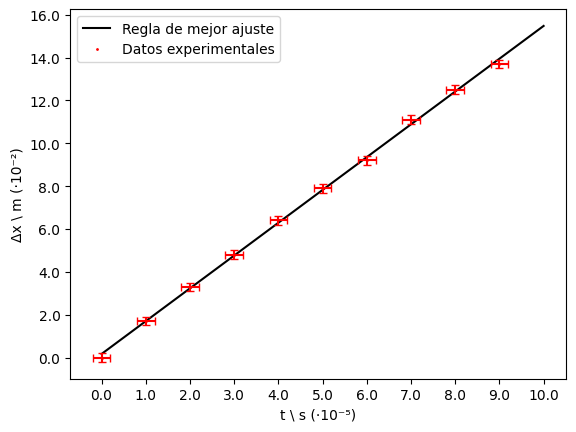

In [152]:
# Velocidad de pulso
T_cuadrado = 10*10**(-6)
pulso_T10 = np.array([358, 375, 391, 406, 422, 437, 450, 469, 483, 495])/1000

X = np.array(list(T_cuadrado*n for n in range(len(pulso_T10))))
Y = (pulso_T10 - pulso_T10[0])
ajuste = regresion_lineal(X,Y)
print(f"Velocidad de grupo en alcohol: {representar_numero(ajuste[0], ajuste[2])}")
print(f"Coordenada origen: {representar_numero(ajuste[1], ajuste[3])}")
print(f"r²: {representar_r(ajuste[4]**2)}")

X = 10**5*X
Y = 10**2*Y

p = np.polyfit(X,Y,1)
x = np.linspace(0, 10)
y = np.polyval(p, x)

fig = plt.figure()
plt.plot(x, y, label="Regla de mejor ajuste", color="black")
plt.plot(X, Y, "o", label="Datos experimentales", color="red", markersize=1)
plt.legend()
plt.errorbar(X, Y, xerr=0.2, ls="none", color="red", barsabove=True, capsize=3)
plt.errorbar(X, Y, yerr=0.2, ls="none", color="red", barsabove=True, capsize=3)
xformatter = ticker.FuncFormatter(lambda x, _: f"{x:.1f}")
yformatter = ticker.FuncFormatter(lambda x, _: f"{x:.1f}")
plt.gca().xaxis.set_major_formatter(xformatter)
plt.gca().yaxis.set_major_formatter(yformatter)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.xlabel("t \\ s (⋅10⁻⁵)")
plt.ylabel("Δx \\ m (⋅10⁻²)")
plt.show()
fig.savefig('Fotos/grupo_alcohol.png')